## 📝 Data Description
1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
4. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
5. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
6. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
7. Country: Country name. Nominal, the name of the country where each customer resides.

In [325]:
#Import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
#Load the data
data = pd.read_csv("data.csv",  encoding="ISO-8859-1")

# Display the first 10 rows of the dataframe
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [327]:
# Display basic information about the DataFrame
print("Overview:")
data.info()

Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [328]:
# Get summary of statistical data
print("Summary of the data:")
summary = data.describe().T
summary

Summary of the data:


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [329]:
# knowing the number of unique values in each feature variable
print("Unique of the data:")
number_of_unique = data.nunique()
number_of_unique

Unique of the data:


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Cleaning & Transformation

In [330]:
# chceking for null values
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

When examining the quantity of missing values within the dataframe, it's worth highlighting that up to 135080 of the entries do not have an associated customer assignment so this data were can't use to determine the customer segmentation so i decided to remove the null customer values

In [331]:
#Drop data
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

Then, in the product description column, I decided to replac the null values with 'None'

In [332]:
data['Description'] = data['Description'].fillna('None')

In [333]:
#Checking of null values
missing_values_count = data.isnull().sum()
missing_values_count[0:8]

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [334]:
print('Duplicated Data: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Duplicated Data: 5225


In [335]:
#check minus values in unitPrice
invalid_unitprice = data[data['Quantity'] < 0]
invalid_unitprice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


After checking the quantity, I found that the negative values in the quantity column correspond to transactions that have been canceled. Therefore, I decided to replace those negative quantities with 0, as it indicates that the transactions have been canceled

In [336]:
data.loc[data['Quantity'] < 0, 'Quantity'] = 0
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


The next transformation carried out was to create a new column to determine whether the transaction has a canceled status or not, based on the presence of the code 'c' in the invoiceNo.

In [337]:
data['order_canceled'] = data['InvoiceNo'].apply(lambda x:int('C' in x))
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0


For RFM Segmentation, one crucial aspect is Sales Information, which can be obtained from the data by multiplying the quantity and the corresponding price.

In [338]:
# Calculate total sales for each transaction
data['total_sales'] = data['UnitPrice'] * data['Quantity']

Remember that in the data info, the type of InvoiceDate is 'Object' so it needs to be converted to a datetime type. After that, we can extract the month and year from the transaction date.

In [339]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%Y')
data['Month'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%m')

In [340]:
#Checking Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       401604 non-null  object        
 1   StockCode       401604 non-null  object        
 2   Description     401604 non-null  object        
 3   Quantity        401604 non-null  int64         
 4   InvoiceDate     401604 non-null  datetime64[ns]
 5   UnitPrice       401604 non-null  float64       
 6   CustomerID      401604 non-null  float64       
 7   Country         401604 non-null  object        
 8   order_canceled  401604 non-null  int64         
 9   total_sales     401604 non-null  float64       
 10  Year            401604 non-null  object        
 11  Month           401604 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 39.8+ MB


## Data Exploration

In [341]:
df_corr = data[['Quantity','UnitPrice','total_sales',]].corr()
df_corr

,Quantity,UnitPrice,total_sales
Quantity,1.000000,-0.001801,0.908884
UnitPrice,-0.001801,1.000000,0.025370
total_sales,0.908884,0.025370,1.000000


<Axes: >

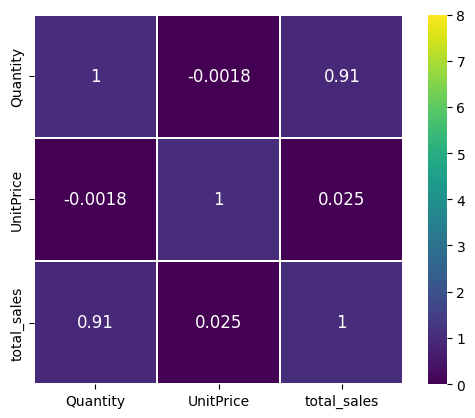

In [342]:
sns.heatmap(df_corr,vmax=8,linewidths=0.01,square=True,annot=True, cmap='viridis',linecolor='white',annot_kws= {'size':12})

## Analysis
The heatmap displayed above reveals noticeable patterns in the data. It demonstrates a significant negative correlation, implying an inverse relationship between the analyzed variables. In simpler terms, as one variable decreases, the other tends to decrease as well, and conversely, as one increases, the other typically increases.

Furthermore, there appears to be a nearly positive correlation between sales and profit. This suggests that when sales increase, profit tends to rise as well.

Please note that correlation is a statistical metric used to quantify the relationship between two variables. Its values can range from -1 to 1, with the following interpretations:

- A value of -1 indicates a perfect negative correlation.
- A value of 0 indicates no correlation.
- A value of 1 indicates a perfect positive correlation.

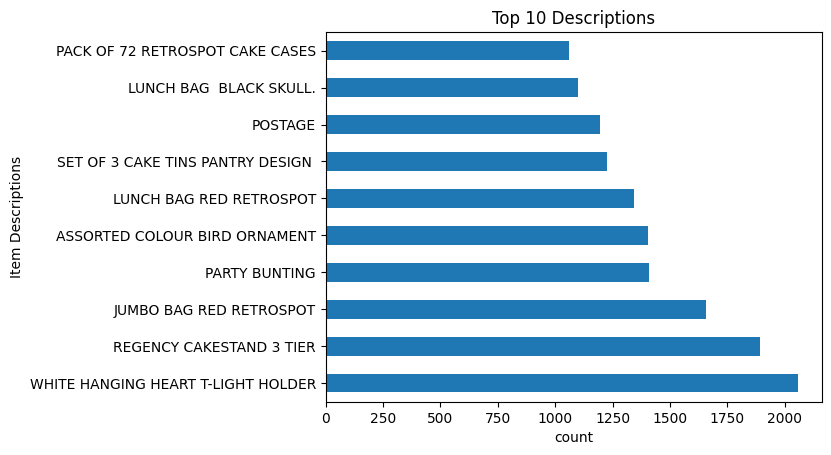

In [343]:
#sales distribution by top 10 description
ax = data['Description'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Descriptions')
plt.ylabel('Item Descriptions')
plt.xlabel('count')
plt.show()

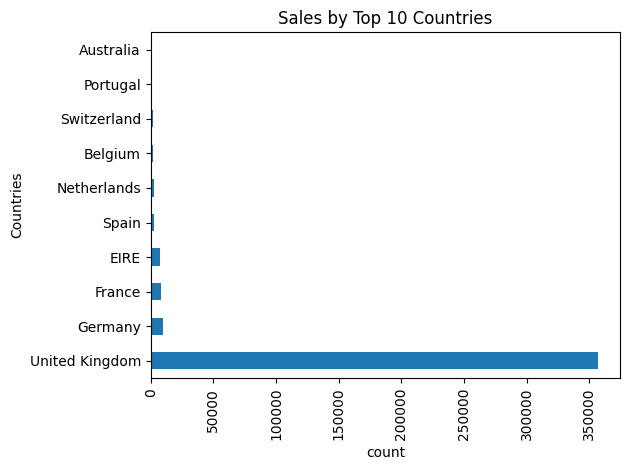

In [344]:
#sales distribution by top 10 countries
ax= data['Country'].value_counts().head(10).plot(kind='barh')
plt.title('Sales by Top 10 Countries')
plt.ylabel('Countries')
plt.xlabel('count')
plt.xticks(rotation=90)
plt.tight_layout()

In [345]:
piv_data = data[["Country", "order_canceled"]].groupby("Country").agg({"order_canceled": [sum, 'count']})
piv_data["order_canceled", "perc"] = piv_data["order_canceled"]["sum"] / piv_data["order_canceled"]["count"]

Top_canceled = piv_data.sort_values(by=[("order_canceled", "perc")], ascending=False)
Top_canceled.head(10)

order_canceled                
                          sum count      perc
Country                                      
USA                       112   291  0.384880
Czech Republic              5    30  0.166667
Malta                      15   127  0.118110
Japan                      37   358  0.103352
Saudi Arabia                1    10  0.100000
Australia                  74  1258  0.058824
Italy                      45   803  0.056040
Germany                   453  9480  0.047785
EIRE                      247  7475  0.033043
Poland                     11   341  0.032258

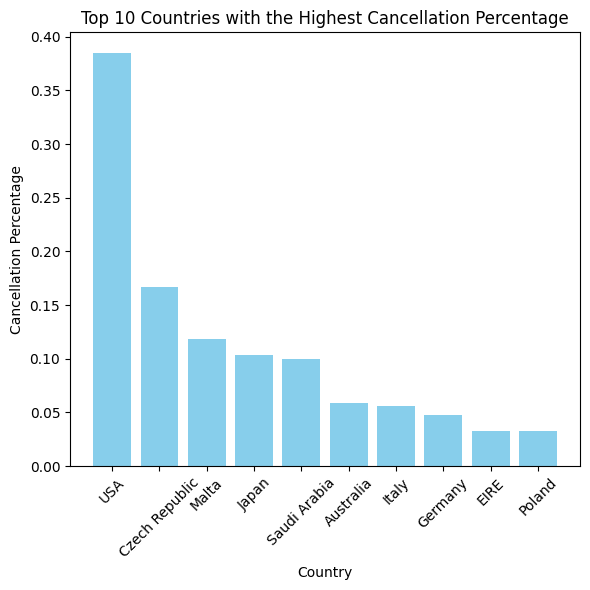

In [346]:
# Assuming you already have the 'Top_canceled' DataFrame
top_10 = Top_canceled.head(10)

# Extract the 'Country' and 'perc' columns
countries = top_10.index.get_level_values('Country')
perc = top_10[('order_canceled', 'perc')]

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(countries, perc, color='skyblue')
plt.title('Top 10 Countries with the Highest Cancellation Percentage')
plt.xlabel('Country')
plt.ylabel('Cancellation Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

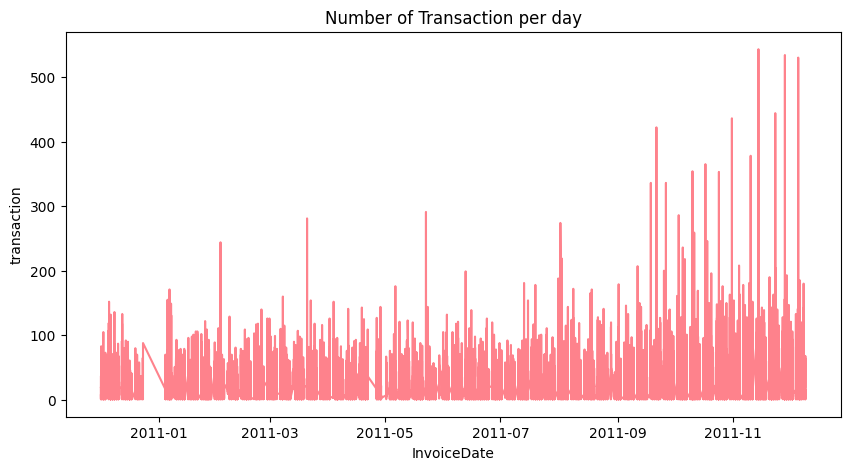

In [347]:
# visualizing number of transaction made perday using lineplot
num_trans_perday = data['InvoiceDate'].value_counts().to_frame().reset_index().rename(columns= {'index':'InvoiceDate', 'InvoiceDate':'transaction'})

plt.figure(figsize= (10,5))
sns.lineplot(x= 'InvoiceDate', y= 'transaction', data= num_trans_perday, color= '#fe828c')
plt.title('Number of Transaction per day')
plt.show()

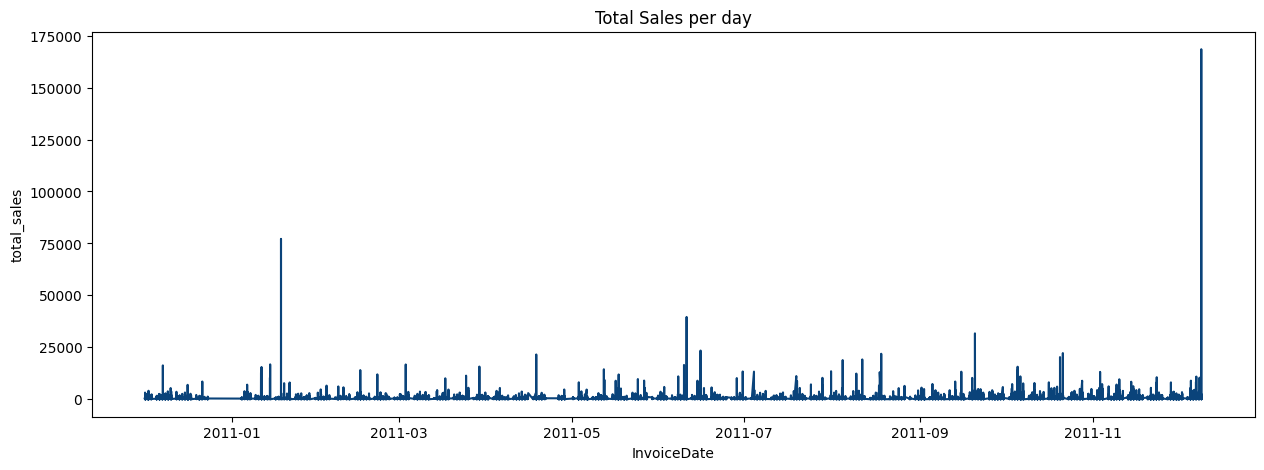

In [348]:
# visualizing total sales perday using lineplot
sales_perday = data.groupby('InvoiceDate')['total_sales'].sum().sort_values(ascending= False).to_frame().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'InvoiceDate', y= 'total_sales', data= sales_perday, color= '#0a437a')
plt.title('Total Sales per day')
plt.show()

In [349]:
# # understanding the relationship between each feature variables using pairplot
# sns.pairplot(data= data, hue= 'total_sales', palette= 'crest')
# plt.show()

## First Part of Data
*   Splitting the whole dataset into two parts.
    * first part without last 3 months of transactions
    * second part with only last 3 months of transactions



In [350]:
# getting the latest invoice date in the dataset
latest_invoice_date = data['InvoiceDate'].max()
latest_invoice_date

Timestamp('2011-12-09 12:50:00')

In [351]:
# taking the first part of data that doesn't have last 3 months of transaction

df_part1 = data.copy() # creating copy
df_part1.set_index('InvoiceDate', inplace= True) # setting Date as index
df_part1 = df_part1.loc[:'2011-09-09'] # slicing the data

In [352]:
# taking the first part of data that have last 3 months of transaction
df_part2 = data.copy() # creating copy
df_part2.set_index('InvoiceDate', inplace= True) # setting Date as index
df_part2 = df_part2.loc['2011-09-09':] # slicing the data

In [353]:
# reseting the index
df_part1.reset_index(inplace= True)
df_part2.reset_index(inplace= True)

In [354]:
# viewing the data of df_part1
df_part1.head(100)


,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,total_sales,Year,Month
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,0,15.30,2010,12
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,0,20.34,2010,12
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,0,22.00,2010,12
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,0,20.34,2010,12
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,0,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2010-12-01 09:37:00,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2.55,14688.0,United Kingdom,0,15.30,2010,12
96,2010-12-01 09:37:00,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,0.42,14688.0,United Kingdom,0,50.40,2010,12
97,2010-12-01 09:37:00,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,0.55,14688.0,United Kingdom,0,13.20,2010,12
98,2010-12-01 09:37:00,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,0.55,14688.0,United Kingdom,0,13.20,2010,12


In [355]:
# viewing the data of df_part2
df_part2.head(100)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,total_sales,Year,Month
0,2011-09-09 08:48:00,566074,22624,IVORY KITCHEN SCALES,2,8.50,12535.0,France,0,17.00,2011,09
1,2011-09-09 08:48:00,566074,22138,BAKING SET 9 PIECE RETROSPOT,6,4.95,12535.0,France,0,29.70,2011,09
2,2011-09-09 08:48:00,566074,90184C,BLACK CHUNKY BEAD BRACELET W STRAP,4,8.95,12535.0,France,0,35.80,2011,09
3,2011-09-09 08:48:00,566074,21155,RED RETROSPOT PEG BAG,12,2.55,12535.0,France,0,30.60,2011,09
4,2011-09-09 08:48:00,566074,22558,CLOTHES PEGS RETROSPOT PACK 24,12,1.65,12535.0,France,0,19.80,2011,09
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-09-09 09:52:00,566079,23396,LA JARDIN BOTANIQUE CUSHION COVER,4,3.75,17593.0,United Kingdom,0,15.00,2011,09
96,2011-09-09 09:52:00,566079,23395,BELLE JARDINIERE CUSHION COVER,4,3.75,17593.0,United Kingdom,0,15.00,2011,09
97,2011-09-09 09:52:00,566079,23403,LETTER HOLDER HOME SWEET HOME,4,3.75,17593.0,United Kingdom,0,15.00,2011,09
98,2011-09-09 09:52:00,566079,23425,STORAGE TIN HOME SWEET HOME,6,2.49,17593.0,United Kingdom,0,14.94,2011,09


## RFM Analysis
RFM analysis is a widely employed technique in marketing to assess a customer's worth by considering:
1. Recency: The time elapsed since their last purchase.
2. Frequency: How frequently they make purchases.
3. Monetary Value: The average amount they spend during their purchases.

### Recency
To determine the recent activity of a customer, we must accurately establish the last time each user was observed making a purchase.



In [356]:
# use the most recent date of purchase
df_part2['rank'] = df_part2.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)
df_rec = df_part2[df_part2['rank']==1]

In the newly generated dataframe, we've retained only the rows corresponding to each customer's most recent purchase date. Our next step is to assess and assign a recency score to each customer based on the time of their last purchase. As the example,recency value will be higher for customers who made a transaction 2 days ago compared to customers who made a transaction 2 months ago.

In [357]:
df_rec['recency'] = (df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['InvoiceDate']))).dt.days

<ipython-input-357-0e87cd093874>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [358]:
df_rec

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,total_sales,Year,Month,rank,recency
0,2011-09-09 08:48:00,566074,22624,IVORY KITCHEN SCALES,2,8.50,12535.0,France,0,17.00,2011,09,1,0
1,2011-09-09 08:48:00,566074,22138,BAKING SET 9 PIECE RETROSPOT,6,4.95,12535.0,France,0,29.70,2011,09,1,0
2,2011-09-09 08:48:00,566074,90184C,BLACK CHUNKY BEAD BRACELET W STRAP,4,8.95,12535.0,France,0,35.80,2011,09,1,0
3,2011-09-09 08:48:00,566074,21155,RED RETROSPOT PEG BAG,12,2.55,12535.0,France,0,30.60,2011,09,1,0
4,2011-09-09 08:48:00,566074,22558,CLOTHES PEGS RETROSPOT PACK 24,12,1.65,12535.0,France,0,19.80,2011,09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163216,2011-12-09 12:16:00,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,1.25,12713.0,Germany,0,15.00,2011,12,1,91
163217,2011-12-09 12:16:00,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,0.85,12713.0,Germany,0,10.20,2011,12,1,91
163218,2011-12-09 12:16:00,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,0.85,12713.0,Germany,0,10.20,2011,12,1,91
163219,2011-12-09 12:16:00,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2.08,12713.0,Germany,0,24.96,2011,12,1,91


### Frequency
"To calculate Frequency, which represents how many times each customer has made a purchase on the platform, we utilize a group by operation on customerID and Date to obtain the frequency values.

In [359]:
freq = df_rec.groupby('CustomerID')['InvoiceDate'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [360]:
rec_freq = df_freq.merge(df_rec,on='CustomerID')

### Monetary Value
To determine the Monetary value, we need to calculate the total purchases made by each customer by multiplying the quantity and unit price of the items they bought. Then, we group this total sales by customerID to obtain the Monetary value

In [361]:
m = rec_freq.groupby('CustomerID')['total_sales'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [362]:
rfm_data = m.merge(rec_freq,on='CustomerID')

In [363]:
rfm= rfm_data
rfm

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,order_canceled,total_sales,Year,Month,rank,recency
0,12347.0,1294.32,47,2011-10-31 12:25:00,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,3.75,Iceland,0,45.00,2011,10,1,52
1,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21265,PINK GOOSE FEATHER TREE 60CM,12,1.95,Iceland,0,23.40,2011,10,1,52
2,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21636,MADRAS NOTEBOOK MEDIUM,12,0.75,Iceland,0,9.00,2011,10,1,52
3,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,4.25,Iceland,0,17.00,2011,10,1,52
4,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,4.25,Iceland,0,34.00,2011,10,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75094,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23076,ICE CREAM SUNDAE LIP GLOSS,24,1.25,United Kingdom,0,30.00,2011,10,1,33
75095,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23310,BUBBLEGUM RING ASSORTED,36,0.42,United Kingdom,0,15.12,2011,10,1,33
75096,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22421,LIPSTICK PEN FUSCHIA,12,0.42,United Kingdom,0,5.04,2011,10,1,33
75097,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22419,LIPSTICK PEN RED,12,0.42,United Kingdom,0,5.04,2011,10,1,33


In [364]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]


<ipython-input-365-4b1c60382972>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-365-4b1c60382972>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-365-4b1c60382972>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

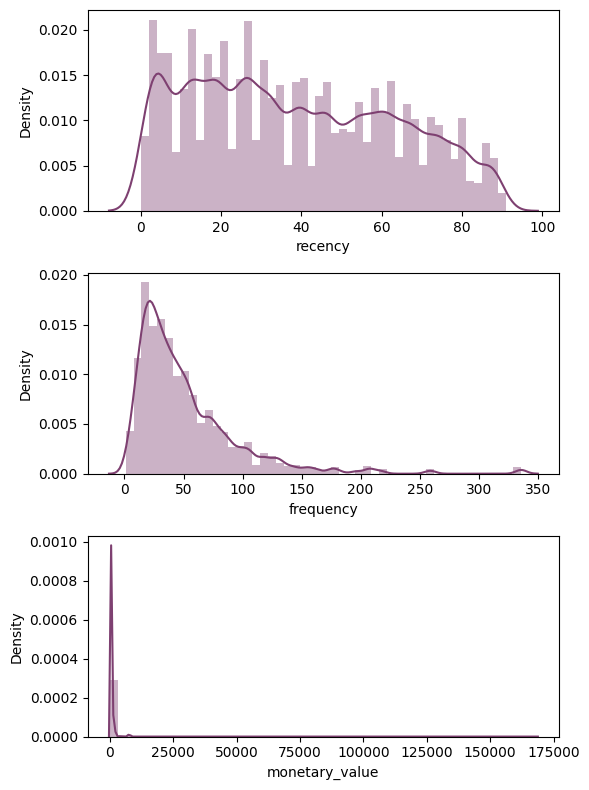

In [365]:
# visualizing the distribution of feature variables in RFM dataframe using distplot
fig, axis = plt.subplots(3,1, figsize= (6,8))

for i,feature in enumerate(['recency', 'frequency', 'monetary_value']):
    sns.distplot(x= rfm[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)

plt.tight_layout()
plt.show()

In [366]:
# sorting the recency, frequency and monetary values of customers into bins using pd.cut() to get their respective scores
# Calculate maximum values for each metric
max_recency = rfm['recency'].max()
max_frequency = rfm['frequency'].max()
max_monetary = rfm['monetary_value'].max()
max_recency

91

In [367]:

# Define bin edges and labels for recency
recency_bins = [-1, 20, 40, 50, max_recency ]
recency_labels = [4,3,2,1]  # One fewer label than bin edges]

# Define bin edges and labels for frequency
frequency_bins = [0, 50, 100, 200, max_frequency ]
frequency_labels = [1,2,4,8]  # One fewer label than bin edges]

# Define bin edges and labels for monetary
monetary_bins = [-1, 1000, 5000, 10000, max_monetary]
monetary_labels = [1,3,6,10]  # One fewer label than bin edges

# Calculate R_Score, F_Score, and M_Score for each customer
rfm['R_Score'] = pd.cut(rfm['recency'], bins=recency_bins, labels=recency_labels).astype('int64')
rfm['F_Score'] =  pd.cut(rfm['frequency'], bins=frequency_bins, labels=frequency_labels).astype('int64')
rfm['M_Score'] = pd.cut(rfm['monetary_value'], bins=monetary_bins, labels=monetary_labels)



In [368]:
# concatenating the scores for each customer to get their values
rfm['RFM_Value'] = rfm.apply(lambda x: str(int(x['R_Score'])) + str(int(x['F_Score'])) + str(int(x['M_Score'])), axis=1)

In [369]:
# adding the the scores for each customer to get their overall score
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)
rfm

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,...,total_sales,Year,Month,rank,recency,R_Score,F_Score,M_Score,RFM_Value,RFM_Score
0,12347.0,1294.32,47,2011-10-31 12:25:00,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,3.75,Iceland,...,45.00,2011,10,1,52,1,1,3,113,5
1,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21265,PINK GOOSE FEATHER TREE 60CM,12,1.95,Iceland,...,23.40,2011,10,1,52,1,1,3,113,5
2,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21636,MADRAS NOTEBOOK MEDIUM,12,0.75,Iceland,...,9.00,2011,10,1,52,1,1,3,113,5
3,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,4.25,Iceland,...,17.00,2011,10,1,52,1,1,3,113,5
4,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,4.25,Iceland,...,34.00,2011,10,1,52,1,1,3,113,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75094,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23076,ICE CREAM SUNDAE LIP GLOSS,24,1.25,United Kingdom,...,30.00,2011,10,1,33,3,1,3,313,7
75095,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23310,BUBBLEGUM RING ASSORTED,36,0.42,United Kingdom,...,15.12,2011,10,1,33,3,1,3,313,7
75096,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22421,LIPSTICK PEN FUSCHIA,12,0.42,United Kingdom,...,5.04,2011,10,1,33,3,1,3,313,7
75097,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22419,LIPSTICK PEN RED,12,0.42,United Kingdom,...,5.04,2011,10,1,33,3,1,3,313,7


## K-Means Clustering

In [370]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [371]:
# assigning the required independent feature variables of RFM dataframe to X_rfm variable
X_rfm = rfm[['R_Score', 'F_Score', 'M_Score', 'RFM_Value', 'RFM_Score']]

In [372]:
# standardizing the data with StandardScaler
std_scaler = StandardScaler()
X_rfm = std_scaler.fit_transform(X_rfm)

Inertia: [375494.9999999902, 236429.8557623899, 140814.76227423458, 129178.00134489714, 101245.00371692597, 75457.18589446694, 80072.18938544116, 55505.52846777486, 49624.09427851756, 40965.722169468645, 34974.28219620389, 29985.197411361267, 23786.061079278712, 20053.482341301024]


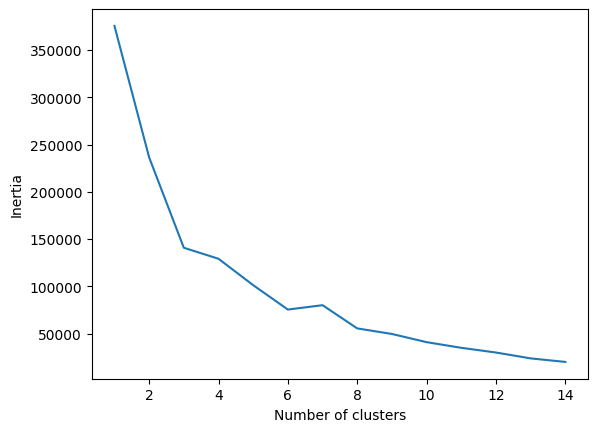

In [373]:
import io
import sys
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def train_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, verbose=2, n_init=1)
    kmeans.fit(X_rfm)
    return kmeans

# Redirect output function
def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(*inp)
    printed = new_stdout.getvalue()

    sys.stdout = old_stdout
    return returned, printed

# List to store inertia values
inertia_values = []

# Vary the number of clusters
cluster_range = range(1, 15)

# Call the redirect function for each cluster count
for n_clusters in cluster_range:
    returned, _ = redirect_wrapper(train_kmeans, (X_rfm, n_clusters))
    kmeans = returned
    inertia_values.append(kmeans.inertia_)

# Print and plot the inertia values
print("Inertia:", inertia_values)

plt.plot(cluster_range, inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Segmentation Process

In [374]:
max_rfmscore = rfm['RFM_Score'].max()
max_rfmscore

15

In [375]:
rfm['Seg_Num'] = pd.cut(rfm['RFM_Score'], bins= [2, 6, 8 ,14, 15],
                               labels= [4,3,2,1]) # getting Segment_Number for each customer

rfm['Segment_Label'] = pd.cut(rfm['RFM_Score'], bins= [ 2, 6, 8 ,14, 15],
                              labels= ['Basic Customer', 'Standard Customer',
                                       'Prime Customer', 'Elite Customer']) # getting Segment_Label for each customer

rfm['Seg_Num'].unique()

[4, 2, 3, 1]
Categories (4, int64): [4 < 3 < 2 < 1]

In [376]:
zero = rfm[rfm['Segment_Label'] == 'Elite Customer']
zero

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,...,Month,rank,recency,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label
9802,13081.0,7271.34,208,2011-11-04 09:05:00,574328,23234,BISCUIT TIN VINTAGE CHRISTMAS,12,2.89,United Kingdom,...,11,1,56,1,8,6,186,15,1,Elite Customer
9803,13081.0,7271.34,208,2011-11-04 09:05:00,574328,21154,RED RETROSPOT OVEN GLOVE,10,1.25,United Kingdom,...,11,1,56,1,8,6,186,15,1,Elite Customer
9804,13081.0,7271.34,208,2011-11-04 09:05:00,574328,22897,OVEN MITT APPLES DESIGN,10,1.45,United Kingdom,...,11,1,56,1,8,6,186,15,1,Elite Customer
9805,13081.0,7271.34,208,2011-11-04 09:05:00,574328,21217,RED RETROSPOT ROUND CAKE TINS,3,9.95,United Kingdom,...,11,1,56,1,8,6,186,15,1,Elite Customer
9806,13081.0,7271.34,208,2011-11-04 09:05:00,574328,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,4.95,United Kingdom,...,11,1,56,1,8,6,186,15,1,Elite Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,14769.0,3402.13,336,2011-09-18 15:32:00,567183,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,2,4.95,United Kingdom,...,09,1,9,4,8,3,483,15,1,Elite Customer
30579,14769.0,3402.13,336,2011-09-18 15:32:00,567183,23068,ALUMINIUM STAMPED HEART,4,2.49,United Kingdom,...,09,1,9,4,8,3,483,15,1,Elite Customer
30580,14769.0,3402.13,336,2011-09-18 15:32:00,567183,23061,VINTAGE EMBOSSED HEART,18,1.25,United Kingdom,...,09,1,9,4,8,3,483,15,1,Elite Customer
30581,14769.0,3402.13,336,2011-09-18 15:32:00,567183,22723,SET OF 6 HERB TINS SKETCHBOOK,2,3.95,United Kingdom,...,09,1,9,4,8,3,483,15,1,Elite Customer


In [377]:
# understanding the different segment of customers with median value
rfm.groupby('Segment_Label')['recency', 'frequency', 'monetary_value'].median().round().reset_index()

<ipython-input-377-3502cfe879b9>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Segment_Label,recency,frequency,monetary_value
0,Basic Customer,41.0,32.0,357.0
1,Standard Customer,25.0,70.0,1001.0
2,Prime Customer,13.0,105.0,1246.0
3,Elite Customer,9.0,336.0,3402.0


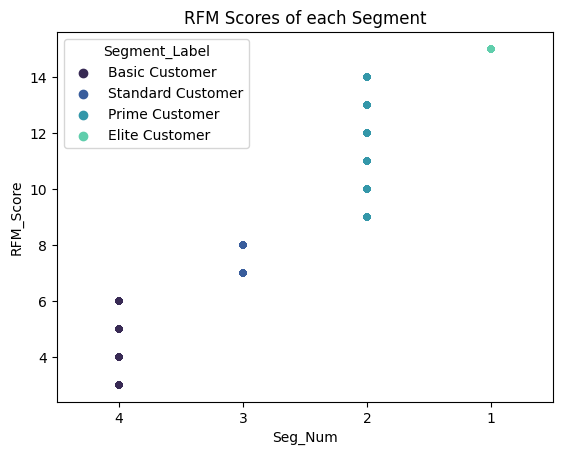

In [378]:
# visualizing the RFM Scores of different segment of customers using strip plot
sns.stripplot(x= 'Seg_Num', y= 'RFM_Score', data= rfm, hue= 'Segment_Label', palette= 'mako', jitter=False)
plt.title('RFM Scores of each Segment')
plt.show()

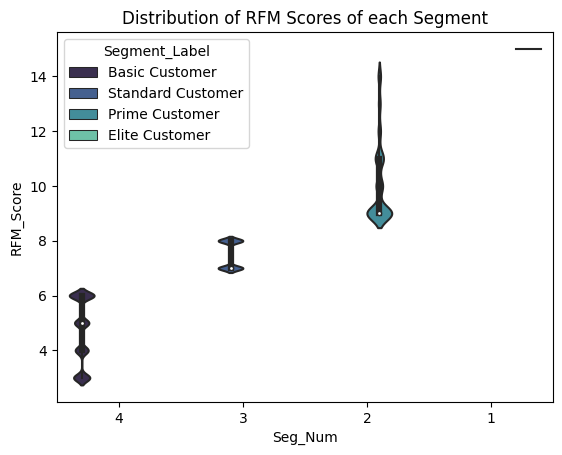

In [379]:
# visualizing the distribution of different segment of customers with their RFM score using violin plot
sns.violinplot(x= 'Seg_Num', y= 'RFM_Score', data= rfm, hue= 'Segment_Label', palette= 'mako')
plt.title('Distribution of RFM Scores of each Segment')
plt.show()

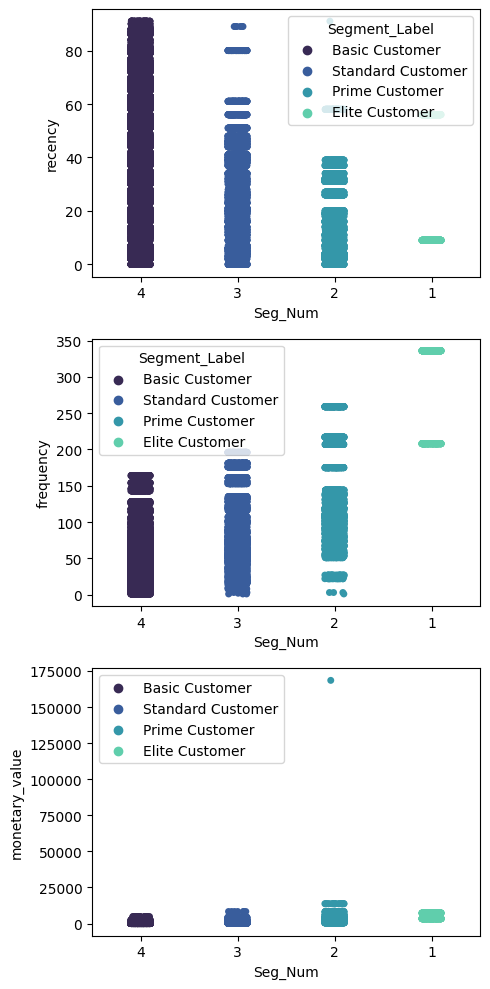

In [380]:
# visualizing the different segment of customers and thier recency, frequency and monetary values using strip plot
fig, axis = plt.subplots(3,1, figsize= (5,10))

for i,feature in enumerate(['recency', 'frequency', 'monetary_value']):
    sns.stripplot(x= 'Seg_Num', y= feature, data= rfm, hue= 'Segment_Label', palette= 'mako', ax= axis[i])

plt.legend()
plt.tight_layout()
plt.show()

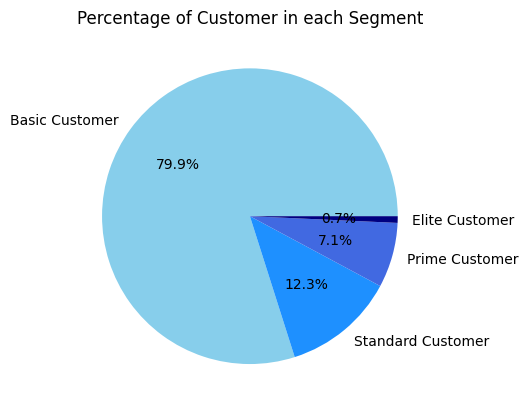

In [381]:
# knowing the percentage of each segment of customers using pie chart
segment_count = rfm['Segment_Label'].value_counts()
custom_colors = ['#87CEEB', '#1E90FF', '#4169E1', '#000080']
plt.pie(segment_count.values, labels= segment_count.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Percentage of Customer in each Segment')
plt.show()

In [382]:
rfm

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,...,Month,rank,recency,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label
0,12347.0,1294.32,47,2011-10-31 12:25:00,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,3.75,Iceland,...,10,1,52,1,1,3,113,5,4,Basic Customer
1,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21265,PINK GOOSE FEATHER TREE 60CM,12,1.95,Iceland,...,10,1,52,1,1,3,113,5,4,Basic Customer
2,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21636,MADRAS NOTEBOOK MEDIUM,12,0.75,Iceland,...,10,1,52,1,1,3,113,5,4,Basic Customer
3,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,4.25,Iceland,...,10,1,52,1,1,3,113,5,4,Basic Customer
4,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,4.25,Iceland,...,10,1,52,1,1,3,113,5,4,Basic Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75094,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23076,ICE CREAM SUNDAE LIP GLOSS,24,1.25,United Kingdom,...,10,1,33,3,1,3,313,7,3,Standard Customer
75095,18287.0,1001.32,38,2011-10-12 10:23:00,570715,23310,BUBBLEGUM RING ASSORTED,36,0.42,United Kingdom,...,10,1,33,3,1,3,313,7,3,Standard Customer
75096,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22421,LIPSTICK PEN FUSCHIA,12,0.42,United Kingdom,...,10,1,33,3,1,3,313,7,3,Standard Customer
75097,18287.0,1001.32,38,2011-10-12 10:23:00,570715,22419,LIPSTICK PEN RED,12,0.42,United Kingdom,...,10,1,33,3,1,3,313,7,3,Standard Customer


## Churn Analysis

In [383]:
# knowing the number of customers in df_part2
df_part2['CustomerID'].nunique()

2927

In [384]:
# getting the number of customers in part1 and part2
part1_customer = df_part1['CustomerID'].sort_values().unique()
part2_customer = df_part2['CustomerID'].sort_values().unique()

In [385]:
# finding how many new customers in part2

New_customers = [] # empty list to store new customers ID

for i in part2_customer:
    if i in part1_customer: # checking customer of part2 data in part1 data
        pass

    else:
        New_customers.append(i) # else appending customer ID to New_customers

print(f'Total Number of New Customers: {len(New_customers)}')

Total Number of New Customers: 960


In [386]:
# finding how many old customers made transaction in last three months

R_next_3months = [] # empty list to store customer ID

for customer_id in rfm['CustomerID']:
    if customer_id in part1_customer and customer_id in part2_customer:
        R_next_3months.append('Yes')
    else:
        R_next_3months.append('No')

rfm['R_Next_3Months'] = R_next_3months

In [387]:
# viewing RFM dataframe
rfm.head()

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,...,rank,recency,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months
0,12347.0,1294.32,47,2011-10-31 12:25:00,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,3.75,Iceland,...,1,52,1,1,3,113,5,4,Basic Customer,Yes
1,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21265,PINK GOOSE FEATHER TREE 60CM,12,1.95,Iceland,...,1,52,1,1,3,113,5,4,Basic Customer,Yes
2,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21636,MADRAS NOTEBOOK MEDIUM,12,0.75,Iceland,...,1,52,1,1,3,113,5,4,Basic Customer,Yes
3,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,4.25,Iceland,...,1,52,1,1,3,113,5,4,Basic Customer,Yes
4,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,4.25,Iceland,...,1,52,1,1,3,113,5,4,Basic Customer,Yes


In [388]:
# finding whether the customer is churned or not based on conditions

Churn = [] # empty list to store the status of churn of customer

for i,j in enumerate(rfm['CustomerID']):

    if rfm['recency'][i] <= 20 and rfm['R_Next_3Months'][i] == 'Yes' :
        Churn.append('No')

    elif rfm['recency'][i] <= 20 and rfm['R_Next_3Months'][i] == 'No' :

        if rfm['frequency'][i] <= 45:
            Churn.append('High Risk')

        else:
            Churn.append('Low Risk')

    elif rfm['recency'][i] > 20 and rfm['R_Next_3Months'][i] == 'Yes'  :

        if rfm['frequency'][i] > 45:
            Churn.append('No')

        else:
            Churn.append('Low Risk')

    elif rfm['recency'][i] > 20 and rfm['R_Next_3Months'][i] == 'No' :
        Churn.append('Yes')

rfm['Churn'] = Churn # adding the new feature variable churn

In [389]:
# viewing RFM dataframe
rfm.head()

,CustomerID,monetary_value,frequency,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,...,recency,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,12347.0,1294.32,47,2011-10-31 12:25:00,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,3.75,Iceland,...,52,1,1,3,113,5,4,Basic Customer,Yes,No
1,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21265,PINK GOOSE FEATHER TREE 60CM,12,1.95,Iceland,...,52,1,1,3,113,5,4,Basic Customer,Yes,No
2,12347.0,1294.32,47,2011-10-31 12:25:00,573511,21636,MADRAS NOTEBOOK MEDIUM,12,0.75,Iceland,...,52,1,1,3,113,5,4,Basic Customer,Yes,No
3,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,4.25,Iceland,...,52,1,1,3,113,5,4,Basic Customer,Yes,No
4,12347.0,1294.32,47,2011-10-31 12:25:00,573511,22375,AIRLINE BAG VINTAGE JET SET BROWN,8,4.25,Iceland,...,52,1,1,3,113,5,4,Basic Customer,Yes,No


In [390]:
# getting the counts of different classes in churn
rfm['Churn'].value_counts()

No           31219
Yes          20863
Low Risk     18932
High Risk     4085
Name: Churn, dtype: int64

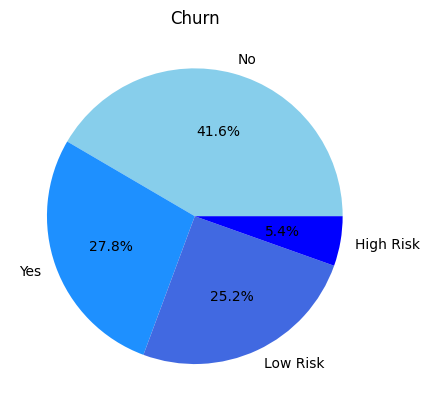

In [391]:
# knowing the percentage of each class in churn using pie chart
churn_count = rfm['Churn'].value_counts()
custom_colors = ['#87CEEB', '#1E90FF', '#4169E1', 'blue']

plt.pie(churn_count.values, labels= churn_count.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Churn')
plt.show()

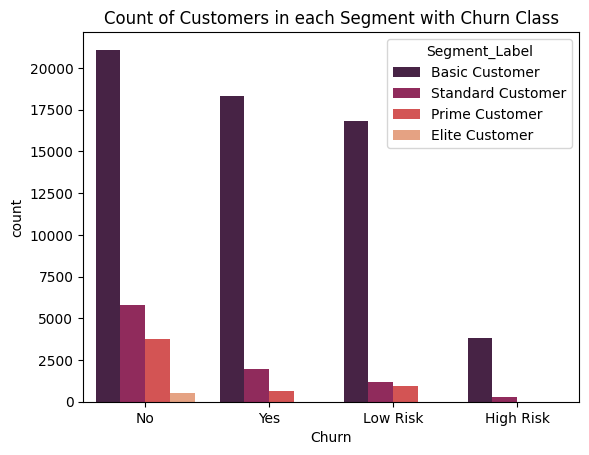

In [392]:
# visualizing different segment of customers and thier churn class
sns.countplot(x= 'Churn', data= rfm, hue= 'Segment_Label', palette= 'rocket')
plt.title('Count of Customers in each Segment with Churn Class')
plt.show()

In [393]:
# visualizing and knowing the percentage of churn class for different segment of customers
segment_list = rfm['Segment_Label'].unique()
rfm['Segment_Label'].unique()
# for i in segment_list:
#     segment = rfm[['Segment_Label','Churn']][rfm.Segment_Label == i]
#     segment_churn = segment.value_counts().to_frame().reset_index().rename(columns= {0:'count'})

#     plt.pie(x= segment_churn['count'], labels= segment_churn['Churn'], autopct= '%.1f%%')
#     plt.title(i)
#     plt.tight_layout()
#     plt.show()

['Basic Customer', 'Prime Customer', 'Standard Customer', 'Elite Customer']
Categories (4, object): ['Basic Customer' < 'Standard Customer' < 'Prime Customer' < 'Elite Customer']

In [394]:
import plotly.express as px # importing plotly

segment_list = rfm['Segment_Label'].unique() # unique segment list
segment_counts = rfm['Segment_Label'].value_counts() # segment counts


segment_list
segment_churn = pd.DataFrame({'Segment_Label': segment_list, 'Churn_Count': segment_counts}) # segment and churn count dataframe

churn_class_counts = rfm.groupby(['Segment_Label', 'Churn']).size().reset_index().rename(columns= {0:'Churn_Class_Count'}) # grouping segment with churn class

# treemap
fig = px.treemap(churn_class_counts, path=['Segment_Label', 'Churn'], values='Churn_Class_Count',
                 title='Customer Segments and Churn Counts by Churn Class')
fig.show()

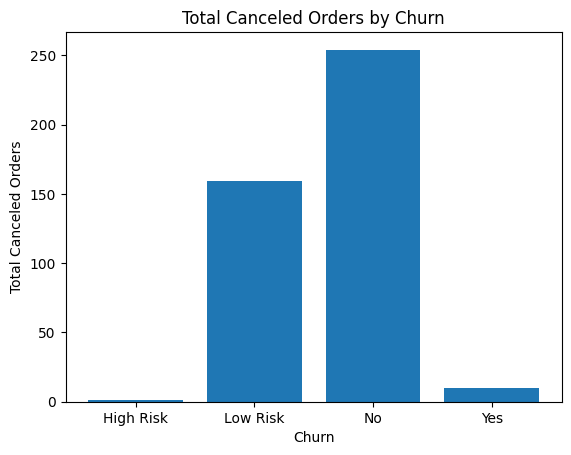

In [439]:
grouped_data = rfm.groupby('Churn')['order_canceled'].sum().reset_index()

# Creating a bar chart
plt.bar(grouped_data['Churn'], grouped_data['order_canceled'])
plt.xlabel('Churn')
plt.ylabel('Total Canceled Orders')
plt.title('Total Canceled Orders by Churn')
plt.show()

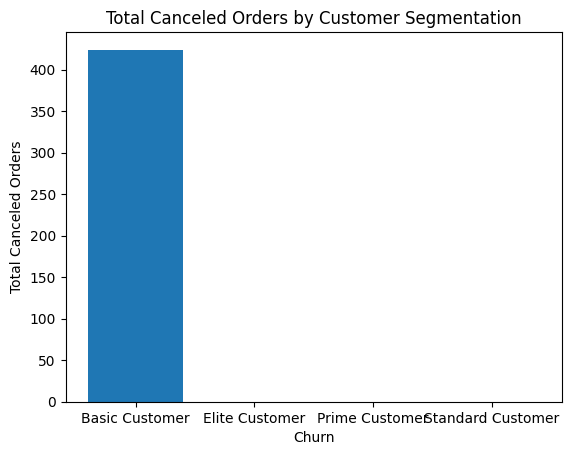

In [442]:
grouped_data = rfm.groupby('Segment_Label')['order_canceled'].sum().reset_index()

# Creating a bar chart
plt.bar(grouped_data['Segment_Label'], grouped_data['order_canceled'])
plt.xlabel('Churn')
plt.ylabel('Total Canceled Orders')
plt.title('Total Canceled Orders by Customer Segmentation')
plt.show()

In [395]:
# converting the datatype of categorical feature from int to object
rfm[['CustomerID', 'Seg_Num', 'Segment_Label']] = rfm[['CustomerID', 'Seg_Num', 'Segment_Label']].astype(object)

In [396]:
# creating correlation matrix for the numeric feature variables
corr = rfm.corr()
corr

<ipython-input-396-0ba5a4f270f8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,monetary_value,frequency,Quantity,UnitPrice,order_canceled,total_sales,rank,recency,R_Score,F_Score,RFM_Score
monetary_value,1.000000,0.361080,0.597998,0.014250,-0.047123,0.605796,NaN,-0.078504,0.063134,0.358775,0.511280
frequency,0.361080,1.000000,-0.014601,-0.027852,-0.071812,-0.012575,NaN,0.037558,-0.054329,0.930795,0.639245
Quantity,0.597998,-0.014601,1.000000,-0.005324,-0.002906,0.985760,NaN,0.002858,0.000346,-0.009177,0.016515
UnitPrice,0.014250,-0.027852,-0.005324,1.000000,0.009502,0.014698,NaN,-0.015204,0.013691,-0.018892,0.003485
order_canceled,-0.047123,-0.071812,-0.002906,0.009502,1.000000,-0.002349,NaN,-0.038154,0.039800,-0.040955,-0.011175
total_sales,0.605796,-0.012575,0.985760,0.014698,-0.002349,1.000000,NaN,0.003051,0.000206,-0.007895,0.017265
rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recency,-0.078504,0.037558,0.002858,-0.015204,-0.038154,0.003051,NaN,1.000000,-0.947066,0.029253,-0.591558
R_Score,0.063134,-0.054329,0.000346,0.013691,0.039800,0.000206,NaN,-0.947066,1.000000,-0.043706,0.608887
F_Score,0.358775,0.930795,-0.009177,-0.018892,-0.040955,-0.007895,NaN,0.029253,-0.043706,1.000000,0.679905


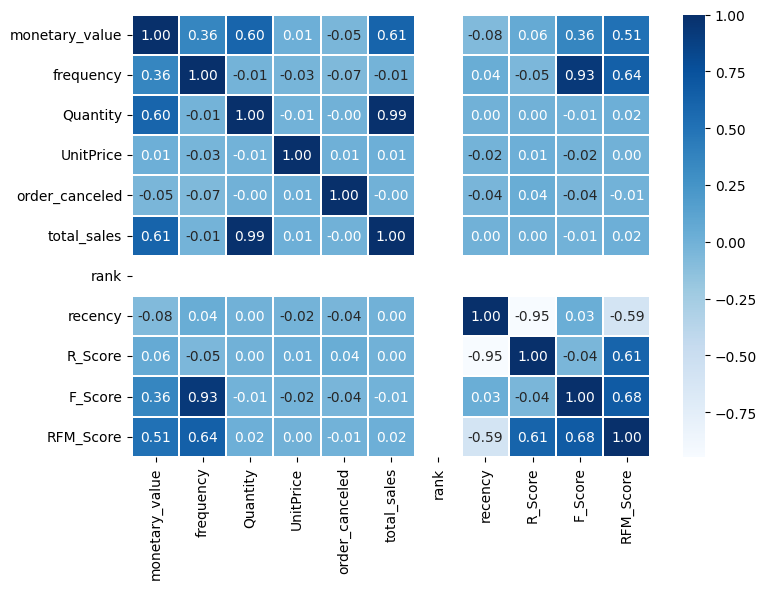

In [397]:
# visualizing the correlation between numeric feature variables using heat map
plt.figure(figsize= (8,6))
sns.heatmap(data= corr, fmt= '.2f', linewidths= 0.2, linecolor= 'white', cmap= 'Blues', annot= True)
plt.tight_layout()
plt.show()